<a href="https://colab.research.google.com/github/sk95068/Mahbub_MCSE/blob/main/FANC_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Lenet**

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
transform = transforms.Compose(
    [transforms.Resize((224,224)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size=4
train_data = torchvision.datasets.ImageFolder('/content/gdrive/MyDrive/FANC/FANC/train',transform=transform)

trainloader = torch.utils.data.DataLoader(train_data,
                                          batch_size=batch_size,
                                          shuffle=True)
val_data = torchvision.datasets.ImageFolder('/content/gdrive/MyDrive/FANC/FANC/val',transform=transform)

valloader = torch.utils.data.DataLoader(val_data,
                                          batch_size=batch_size,
                                          shuffle=True)
classes = ('B', 'M')

<class 'torch.Tensor'>
torch.Size([4, 3, 224, 224])


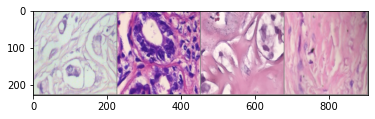

    B     B     M     M


In [ ]:
#some of the training images, for fun.
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))


In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 7)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()
print("end")

end


In [ ]:
# Classification Cross-Entropy loss and SGD with momentum.
import torch.optim as optim
import torchvision.models as models


net=models.AlexNet()
#net= models.densenet121()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
#optimizer= optim.Adam()

In [ ]:
#This is for SDG
val_loss_min=100
net_min=net.state_dict()
otp_min=optimizer.state_dict()
loss_set=[]
net= net.cuda()
print('Start Training')
for epoch in range(100):  
    train_loss = 0.0
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
      # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs=inputs.cuda()
        labels=labels.cuda()
        output=net(inputs)

        # zero the parameter gradients
        optimizer.zero_grad()
        loss = criterion(output, labels)
        loss.backward()
        running_loss += loss.item()
        optimizer.step()
       
    train_loss = running_loss/4.0
    for i, data in enumerate(valloader, 0):
        inputs, labels = data
        inputs=inputs.cuda()
        labels=labels.cuda()
        output=net(inputs)
        val_loss = criterion(output, labels)
    if(val_loss<val_loss_min):
        net_min=net.state_dict()
        otp_min=optimizer.state_dict()
        PATH = './fanc.pth'
        torch.save(net.state_dict(), PATH)

    loss_set.append([train_loss,val_loss])
    print("for epoch",epoch,",training loss",train_loss,"validation loss",val_loss)
print('Finished Training')

Start Training
for epoch 0 ,training loss 184.7372987914132 validation loss tensor(0.2026, device='cuda:0', grad_fn=<NllLossBackward0>)
for epoch 1 ,training loss 66.06711741164327 validation loss tensor(0.7252, device='cuda:0', grad_fn=<NllLossBackward0>)
for epoch 2 ,training loss 61.84740045061335 validation loss tensor(0.1023, device='cuda:0', grad_fn=<NllLossBackward0>)
for epoch 3 ,training loss 56.13207063869777 validation loss tensor(0.4373, device='cuda:0', grad_fn=<NllLossBackward0>)
for epoch 4 ,training loss 50.70897276792675 validation loss tensor(0.5992, device='cuda:0', grad_fn=<NllLossBackward0>)
for epoch 5 ,training loss 48.36175935622305 validation loss tensor(2.1499, device='cuda:0', grad_fn=<NllLossBackward0>)
for epoch 6 ,training loss 43.96869517141022 validation loss tensor(0.4839, device='cuda:0', grad_fn=<NllLossBackward0>)
for epoch 7 ,training loss 44.41508396388963 validation loss tensor(0.7405, device='cuda:0', grad_fn=<NllLossBackward0>)
for epoch 8 ,trai

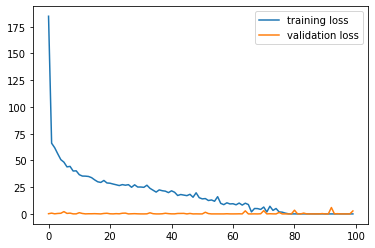

In [ ]:
import matplotlib.pyplot as plt

#This is for SGD
train_loss_line=[]
val_loss_line=[]
x=[]
for i in range(len(loss_set)):
  train_loss_line.append(loss_set[i][0])
  val_loss_line.append(loss_set[i][1])
  x.append(i)
plt.plot(x, train_loss_line, label = "training loss")
plt.plot(x, val_loss_line , label = "validation loss")
plt.legend()
plt.show()


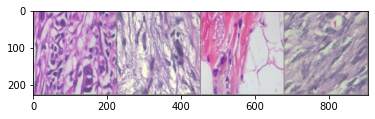

GroundTruth:      M     B     M     B


In [ ]:
#display an image from the test set to get familiar.
dataiter = iter(valloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
#see what the neural network thinks these examples above are:


In [ ]:
dev="cuda"
net.to(dev)
images = images.to(dev)
  
  
output = net(images)


In [ ]:
_, predicted = torch.max(output, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:      M     B     M     B


In [ ]:
# look at how the network performs on the whole dataset.
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in valloader:
        images, labels = data
        images=images.cuda()
        labels=labels.cuda()
        # calculate outputs by running images through the network
        output = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 val images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 val images: 89 %


In [ ]:
#what are the classes that performed well, and the classes that did not perform well:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in valloader:
        images, labels = data
        dev="cuda"
        net.to(dev)
        images = images.to(dev)
        labels=labels.to(dev)
  
        output = net(images)
        _, predictions = torch.max(output, 1)
        #print(labels)
        #print(predictions)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            #print(label)
            #print(label.cpu())
            #print(prediction)
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class B     is: 79.6 %
Accuracy for class M     is: 95.0 %
